# Stocks Prediction

## Capstone Project 2 - Grant Chiu

### Introduction

1: What is the Stock Market? The term stock market refers to several exchanges in which share of pulicly held companies are bought and sold. Such financial activities are conducted through formal exchanges and through over-the-counter (OTC) marketplaces that operated under a definded set of regulations. The goal is to create a predictive model that will determine the trend of Apple stock price. This is a time series analysis.

### The Data

The data was taken from yahoo finance, it is a credible, reliable website with daily stock price stats. The data ranges from 2012-12-01 to 2022-12-01, a decade span of time. Following are the features in the dataset, while closing price refers to the cost of shares at the end of the day, the adjusted closing price considers other factores like dividends, stock splits, and new stock offerings. Since the adjusted closing price begins where the closing price ends, it can be called a more accurate measure of stock's value.

* High
* Low
* Open
* Close
* Volume
* Adj Close






## Load relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import pandas_datareader as pdr
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
start = datetime(2012, 12, 1)
end = datetime(2022, 12, 1)

df_aapl = pdr.get_data_yahoo('AAPL', start, end)

In [3]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-03,21.235357,20.910713,21.201786,20.935356,3.642800e+08,18.004148
2012-12-04,20.778570,20.433214,20.778570,20.566071,5.570684e+08,17.686571
2012-12-05,20.330357,19.241785,20.318214,19.242500,1.044638e+09,16.548315
2012-12-06,19.761070,18.522499,18.890715,19.544287,1.177212e+09,16.807852
2012-12-07,19.828571,18.928572,19.764286,19.044643,7.870408e+08,16.378160


In [4]:
df_aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111380900.0,148.029999
2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998


In [5]:
df_aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2518.0,6.213104e+01,4.898945e+01,1.427143e+01,2.694875e+01,4.087500e+01,8.192313e+01,1.829400e+02
Low,2518.0,6.076726e+01,4.773650e+01,1.375357e+01,2.646188e+01,3.997750e+01,8.078375e+01,1.791200e+02
Open,2518.0,6.143649e+01,4.835223e+01,1.385607e+01,2.675375e+01,4.035000e+01,8.115188e+01,1.826300e+02
Close,2518.0,6.147654e+01,4.839191e+01,1.394750e+01,2.670500e+01,4.037125e+01,8.167563e+01,1.820100e+02
Volume,2518.0,1.755352e+08,1.324419e+08,3.519590e+07,9.286760e+07,1.312634e+08,2.085935e+08,1.460852e+09
Adj Close,2518.0,5.967584e+01,4.891822e+01,1.206459e+01,2.449097e+01,3.826690e+01,8.025417e+01,1.809597e+02


In [6]:
#check any na in the data

df_aapl.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
#check if dtype is datetime
df_aapl.index

DatetimeIndex(['2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06',
               '2012-12-07', '2012-12-10', '2012-12-11', '2012-12-12',
               '2012-12-13', '2012-12-14',
               ...
               '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

In [8]:
#check Dtype
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2012-12-03 to 2022-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2518 non-null   float64
 1   Low        2518 non-null   float64
 2   Open       2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Volume     2518 non-null   float64
 5   Adj Close  2518 non-null   float64
dtypes: float64(6)
memory usage: 137.7 KB


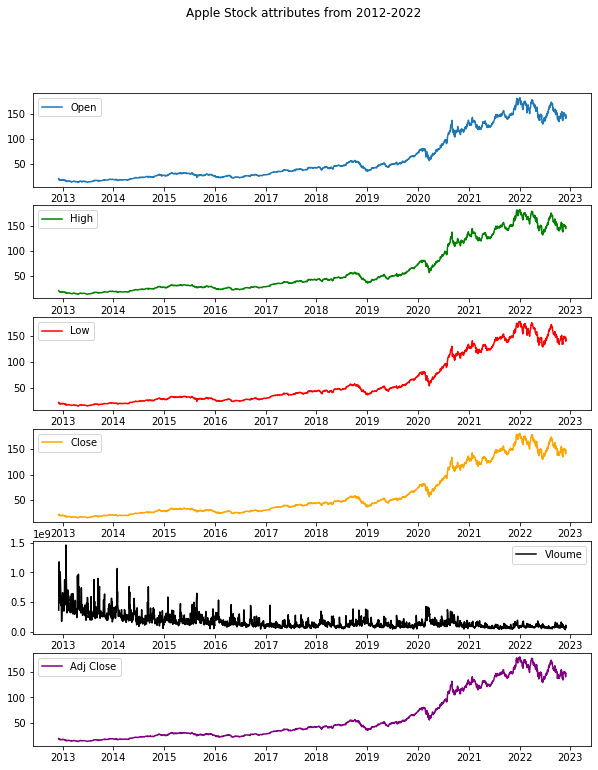

In [9]:
#visualizing the datasets

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(10, 12))
plt.suptitle('Apple Stock attributes from 2012-2022')
ax1.plot(df_aapl['Open'])
ax1.legend(['Open'])
ax2.plot(df_aapl['High'], c='g')
ax2.legend(['High'])
ax3.plot(df_aapl['Low'], c='r')
ax3.legend(['Low'])
ax4.plot(df_aapl['Close'], c='orange')
ax4.legend(['Close'])
ax5.plot(df_aapl['Volume'], c='black')
ax5.legend(['Vloume'])
ax6.plot(df_aapl['Adj Close'], c='purple')
ax6.legend(['Adj Close'])


<AxesSubplot:xlabel='Date'>

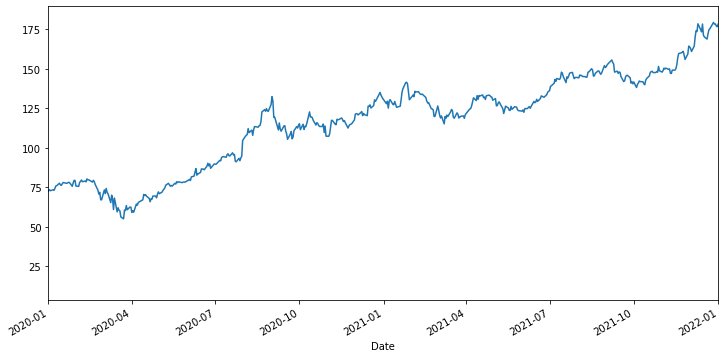

In [10]:
#closer look at the uptrend 

df_aapl['Adj Close'].plot(xlim=['2020-01-01', '2022-'], figsize=(12,6))

<AxesSubplot:>

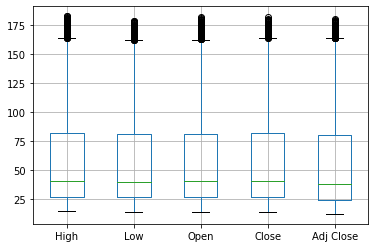

In [11]:
df_aapl.drop('Volume', axis=1).boxplot()

<AxesSubplot:>

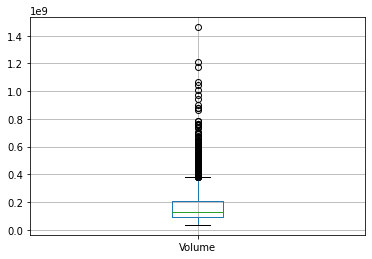

In [12]:
df_aapl[['Volume']].boxplot()

Text(0, 0.5, '% of Return')

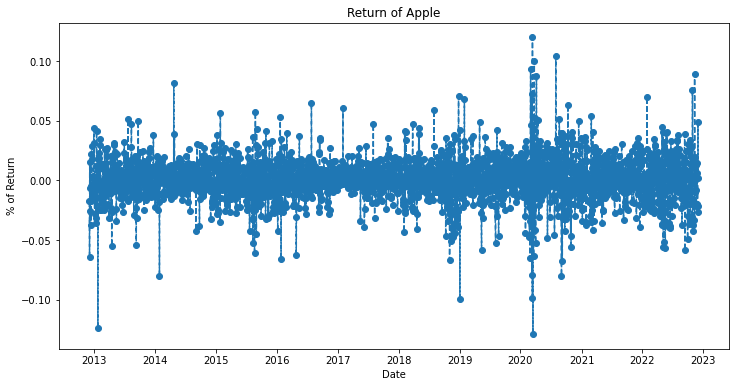

In [13]:
# Return of apple

plt.figure(figsize=(12, 6))
plt.plot(df_aapl['Adj Close'].pct_change(), linestyle='--', marker='o')
plt.title('Return of Apple')
plt.xlabel('Date')
plt.ylabel('% of Return')


Text(0.5, 1.0, 'Average Daily Return of Apple')

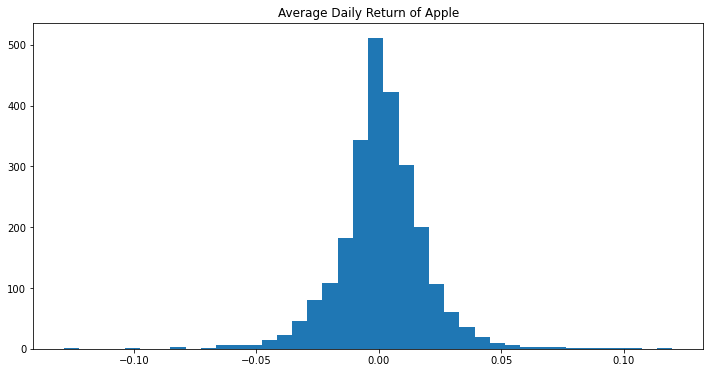

In [14]:
# Daily Return Average of apple

plt.figure(figsize=(12, 6))
plt.hist(df_aapl['Adj Close'].pct_change(), bins=40)
plt.title('Average Daily Return of Apple')


## Time Resampling

In [15]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-03,21.235357,20.910713,21.201786,20.935356,3.642800e+08,18.004148
2012-12-04,20.778570,20.433214,20.778570,20.566071,5.570684e+08,17.686571
2012-12-05,20.330357,19.241785,20.318214,19.242500,1.044638e+09,16.548315
2012-12-06,19.761070,18.522499,18.890715,19.544287,1.177212e+09,16.807852
2012-12-07,19.828571,18.928572,19.764286,19.044643,7.870408e+08,16.378160


In [16]:
# annually close mean price

df_aapl.resample(rule='A').mean()['Adj Close']

Date
2012-12-31     16.341458
2013-12-31     14.713781
2014-12-31     20.592402
2015-12-31     27.249668
2016-12-31     24.237950
2017-12-31     35.542361
2018-12-31     45.312169
2019-12-31     50.702360
2020-12-31     93.916393
2021-12-31    139.800847
2022-12-31    155.856111
Freq: A-DEC, Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

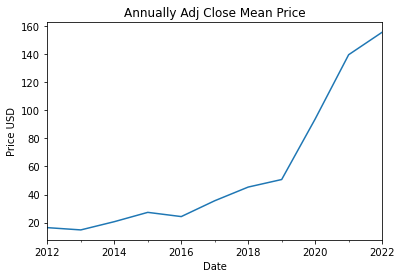

In [17]:
# annually close mean price plot

df_aapl.resample(rule='A').mean()['Adj Close'].plot()
plt.title('Annually Adj Close Mean Price')
plt.xlabel('Date')
plt.ylabel('Price USD')

In [18]:
## annually Adj Close price max

df_aapl.resample(rule='A').max()['Adj Close']

Date
2012-12-31     18.004148
2013-12-31     17.949530
2014-12-31     26.779305
2015-12-31     30.069084
2016-12-31     27.524754
2017-12-31     41.939430
2018-12-31     55.802387
2019-12-31     71.920578
2020-12-31    135.068588
2021-12-31    179.289459
2022-12-31    180.959747
Freq: A-DEC, Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

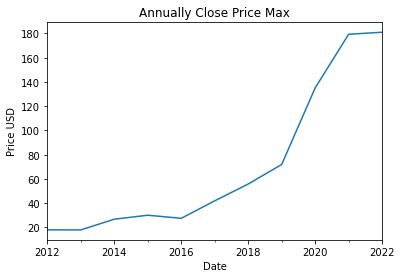

In [19]:
## annually Adj Close price max plot

df_aapl.resample(rule='A').max()['Adj Close'].plot()
plt.title('Annually Close Price Max')
plt.xlabel('Date')
plt.ylabel('Price USD')

In [20]:
# annually Adj CLose price min

df_aapl.resample(rule='A').min()['Adj Close']

Date
2012-12-31     15.651468
2013-12-31     12.064587
2014-12-31     15.735792
2015-12-31     23.500526
2016-12-31     20.914915
2017-12-31     27.144341
2018-12-31     35.429192
2019-12-31     34.309586
2020-12-31     55.082977
2021-12-31    115.151566
2022-12-31    129.664490
Freq: A-DEC, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

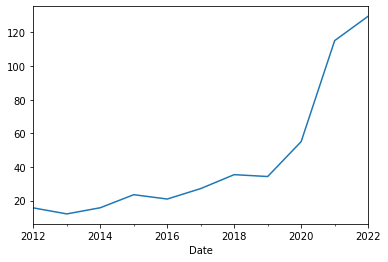

In [21]:
# annually Adj Close price min

df_aapl.resample(rule='A').min()['Adj Close'].plot()

In [22]:
#Date of the highest close

df_aapl['Close'].idxmax()

Timestamp('2022-01-03 00:00:00')

In [23]:
# Price of higest close

df_aapl['Close'].max()

182.00999450683594

In [24]:
#Date of the lowest close

df_aapl['Close'].idxmin()

Timestamp('2013-04-19 00:00:00')

In [25]:
#Price of the lowest close

df_aapl['Close'].min()

13.947500228881836

In [26]:
#simple moving average
df_aapl['Close:5 days rolling'] = df_aapl['Close'].rolling(window=5).mean()
df_aapl['Close:10 days rolling'] = df_aapl['Close'].rolling(window=10).mean()
df_aapl['Close:30 days rolling'] = df_aapl['Close'].rolling(window=30).mean()
df_aapl['Close:60 days rolling'] = df_aapl['Close'].rolling(window=60).mean()
df_aapl['Close:90 days rolling'] = df_aapl['Close'].rolling(window=90).mean()
df_aapl['Close:365 days rolling'] = df_aapl['Close'].rolling(window=365).mean()

Text(0, 0.5, 'Date')

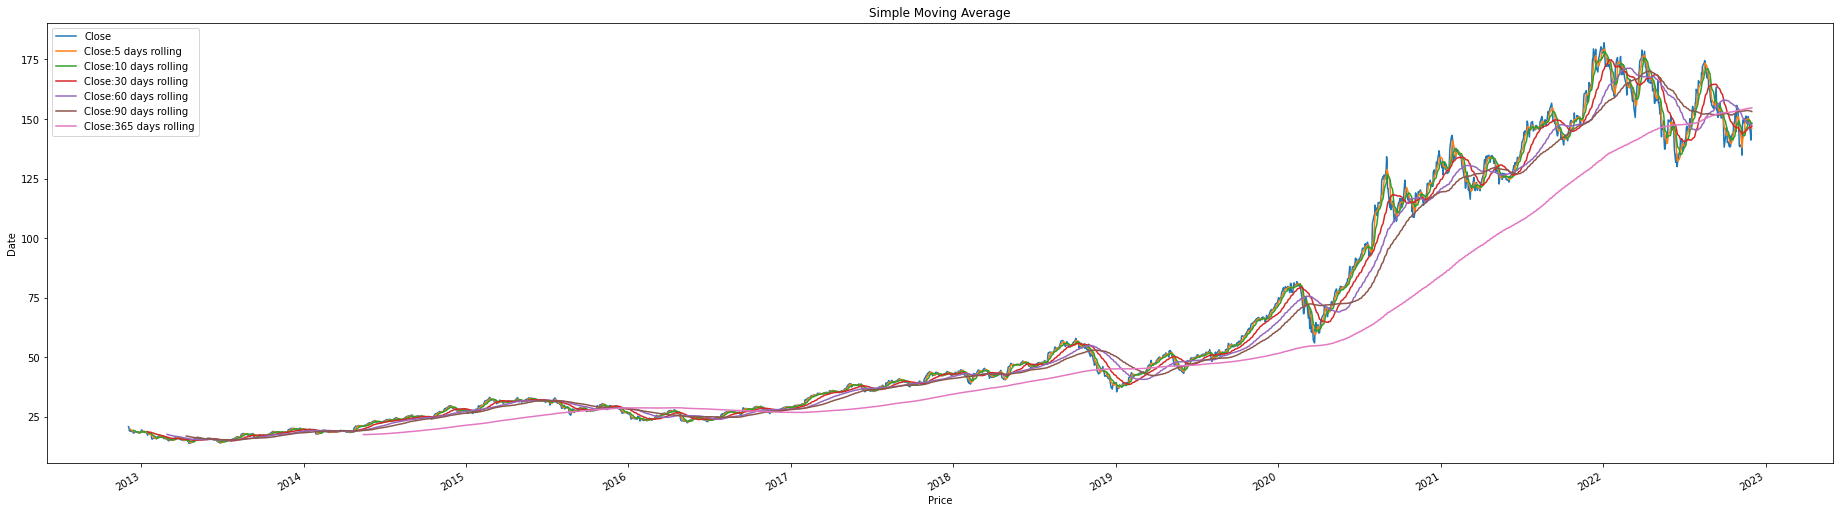

In [27]:
df_aapl[['Close', 'Close:5 days rolling', 'Close:10 days rolling', 'Close:30 days rolling', 'Close:60 days rolling', 'Close:90 days rolling', 'Close:365 days rolling']].plot(figsize=(32, 9))
plt.title('Simple Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')

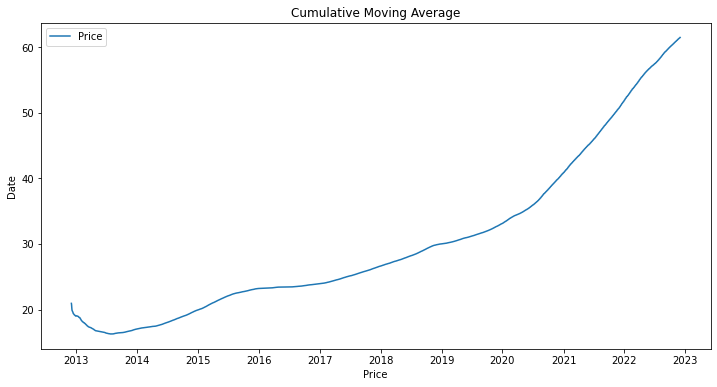

In [28]:
# Cumulative moving average
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Close'].expanding().mean())
plt.title('Cumulative Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')
plt.legend(['Price'])

df_aapl['Close:5 days rolling'] = df_aapl['Close'].rolling(window=5).mean()
df_aapl['Close:10 days rolling'] = df_aapl['Close'].rolling(window=10).mean()
df_aapl['Close:30 days rolling'] = df_aapl['Close'].rolling(window=30).mean()
df_aapl['Close:60 days rolling'] = df_aapl['Close'].rolling(window=60).mean()
df_aapl['Close:90 days rolling'] = df_aapl['Close'].rolling(window=90).mean()
df_aapl['Close:365 days rolling'] = df_aapl['Close'].rolling(window=365).mean()

In [29]:
# Exponential moving average
df_aapl['EMA_5days'] = df_aapl['Close'].ewm(span=5).mean()
df_aapl['EMA_10days'] = df_aapl['Close'].ewm(span=10).mean()
df_aapl['EMA_30days'] = df_aapl['Close'].ewm(span=30).mean()
df_aapl['EMA_60days'] = df_aapl['Close'].ewm(span=60).mean()
df_aapl['EMA_90days'] = df_aapl['Close'].ewm(span=90).mean()
df_aapl['EMA_365days'] = df_aapl['Close'].ewm(span=365).mean()


Text(0, 0.5, 'Date')

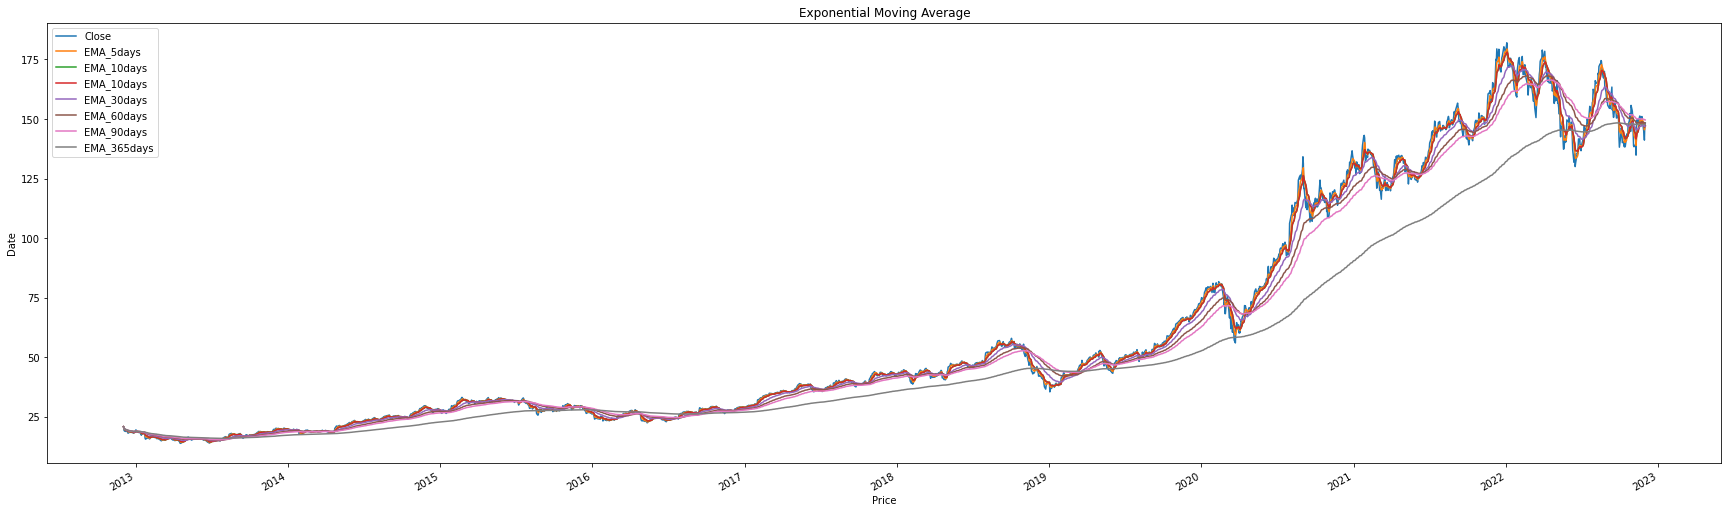

In [30]:
df_aapl[['Close', 'EMA_5days', 'EMA_10days', 'EMA_10days', 'EMA_30days', 'EMA_60days', 'EMA_90days', 'EMA_365days']].plot(figsize=(30, 9))
plt.title('Exponential Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')

## ARIMA

ARIMA (p, d, q):
<br>
p: the order of the AR term (pacf)
<br>
d: the number of differencing required to make the time series stationary (ndiffs)
<br>
q: the order of the MA term (acf)

In [31]:
# def adf_test(series):
#     result = adfuller(series)
#     print('Augmented Dickey-Fuller Test: {}'.format(result[0]))
#     print('p-value: {}'.format(result[1]))
#     if result[1] <= 0.05:
#         print('Strong evidence against the null hypothesis')
#     else:
#         print('Weak evidance against the null hypothesis')

In [32]:
# adf_test(df_aapl['Adj Close'])

In [33]:
# Differencing with shift to compare the time series with a past of itself

# df_aapl['Adj First Difference'] = df_aapl['Adj Close'] - df_aapl['Adj Close'].shift(1)

In [34]:
# df_aapl['Adj First Difference']

In [35]:
# adf_test(df_aapl['Adj First Difference'].dropna())

reject the null hypothesis and no unit root and is stationary

In [36]:
# from pmdarima import auto_arima
# import warnings
# warnings.filterwarnings('ignore')

In [37]:
n = int(len(df_aapl)*0.9)
train = df_aapl[:n]
test = df_aapl[n:]
print(train.shape, test.shape)

(2266, 18) (252, 18)


In [38]:
model_auto = auto_arima(df_aapl['Adj Close'])
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4686.277
Date:                Fri, 06 Jan 2023   AIC                           9380.554
Time:                        17:41:17   BIC                           9403.877
Sample:                             0   HQIC                          9389.018
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0323      0.020      1.639      0.101      -0.006       0.071
ar.L1          0.3755      0.121      3.115      0.002       0.139       0.612
ma.L1         -0.4416      0.118     -3.745      0.000      -0.673      -0.211
sigma2         2.4249      0.028     85.550      0.000       2.369       2.480
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10515.72
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              54.70   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
model = ARIMA(train['Adj Close'], order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3578.495
Date:                Fri, 06 Jan 2023   AIC                           7162.990
Time:                        17:41:17   BIC                           7180.166
Sample:                             0   HQIC                          7169.257
                               - 2266                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4152      0.089     -4.675      0.000      -0.589      -0.241
ma.L1          0.3290      0.092      3.561      0.000       0.148       0.510
sigma2         1.3797      0.015     94.911      0.000       1.351       1.408
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             18718.05
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              31.97   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels')
pred.index = df_aapl.index[start:end+1]
print(pred)

Date
2021-12-02    163.959358
2021-12-03    163.901180
2021-12-06    163.925334
2021-12-07    163.915306
2021-12-08    163.919469
                 ...    
2022-11-25    163.918248
2022-11-28    163.918248
2022-11-29    163.918248
2022-11-30    163.918248
2022-12-01    163.918248
Name: predicted_mean, Length: 252, dtype: float64


<AxesSubplot:xlabel='Date'>

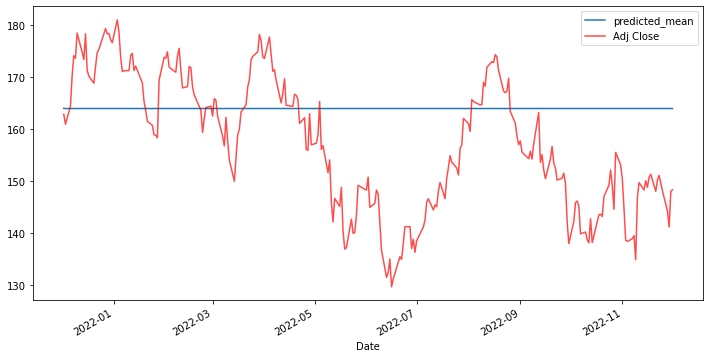

In [41]:
plt.figure(figsize=(12,6))
pred.plot(legend=True, alpha=1)
test['Adj Close'].plot(legend=True, c='r', alpha=0.7)
# train['Adj Close'].plot(legend=True, c='g')

In [42]:
index_future_dates = pd.date_range(start='2022-12-02', end='2023-08-10')
pred = model_fit.predict(start=len(df_aapl), end=len(df_aapl)+251, types='levels')
pred.index = index_future_dates
print(pred)

2022-12-02    163.918248
2022-12-03    163.918248
2022-12-04    163.918248
2022-12-05    163.918248
2022-12-06    163.918248
                 ...    
2023-08-06    163.918248
2023-08-07    163.918248
2023-08-08    163.918248
2023-08-09    163.918248
2023-08-10    163.918248
Freq: D, Name: predicted_mean, Length: 252, dtype: float64


<AxesSubplot:xlabel='Date'>

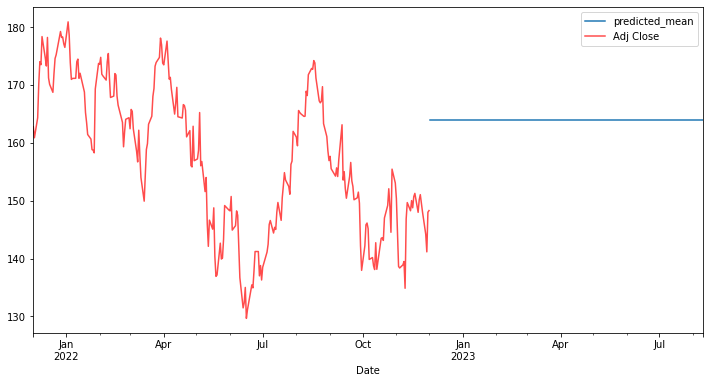

In [43]:
plt.figure(figsize=(12,6))
pred.plot(legend=True, alpha=1)
test['Adj Close'].plot(legend=True, c='r', alpha=0.7)

In [44]:
rmse = math.sqrt(mean_squared_error(pred, test['Adj Close']))
print("The root mean squared error is {}.".format(rmse))
print("Mean value of test dataset is {}".format(test['Adj Close'].mean()))

The root mean squared error is 14.27979860662177.
Mean value of test dataset is 157.28202559455994


## Prophet

In [45]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [46]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Close:5 days rolling,Close:10 days rolling,Close:30 days rolling,Close:60 days rolling,Close:90 days rolling,Close:365 days rolling,EMA_5days,EMA_10days,EMA_30days,EMA_60days,EMA_90days,EMA_365days
Date,,,,,,,,,,,,,,,,,,
2012-12-03,21.235357,20.910713,21.201786,20.935356,3.642800e+08,18.004148,NaN,NaN,NaN,NaN,NaN,NaN,20.935356,20.935356,20.935356,20.935356,20.935356,20.935356
2012-12-04,20.778570,20.433214,20.778570,20.566071,5.570684e+08,17.686571,NaN,NaN,NaN,NaN,NaN,NaN,20.713785,20.732249,20.744559,20.747636,20.748662,20.750207
2012-12-05,20.330357,19.241785,20.318214,19.242500,1.044638e+09,16.548315,NaN,NaN,NaN,NaN,NaN,NaN,20.016861,20.133380,20.210135,20.229109,20.235410,20.244882
2012-12-06,19.761070,18.522499,18.890715,19.544287,1.177212e+09,16.807852,NaN,NaN,NaN,NaN,NaN,NaN,19.820561,19.939300,20.026670,20.049250,20.056828,20.068291
2012-12-07,19.828571,18.928572,19.764286,19.044643,7.870408e+08,16.378160,19.866571,NaN,NaN,NaN,NaN,NaN,19.522697,19.682468,19.803235,19.834714,19.845295,19.861312


In [47]:
shape=df_aapl.shape[0]
df_new=df_aapl[['Adj Close']]
df_new.reset_index(inplace=True)
df_new['Date'] = pd.to_datetime(df_new.Date,format='%Y-%m-%d')
df_new.index = df_new['Date']
df_new.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)

In [48]:
df_new.head()

,ds,y
Date,,
2012-12-03,2012-12-03,18.004148
2012-12-04,2012-12-04,17.686571
2012-12-05,2012-12-05,16.548315
2012-12-06,2012-12-06,16.807852
2012-12-07,2012-12-07,16.378160


<AxesSubplot:xlabel='ds'>

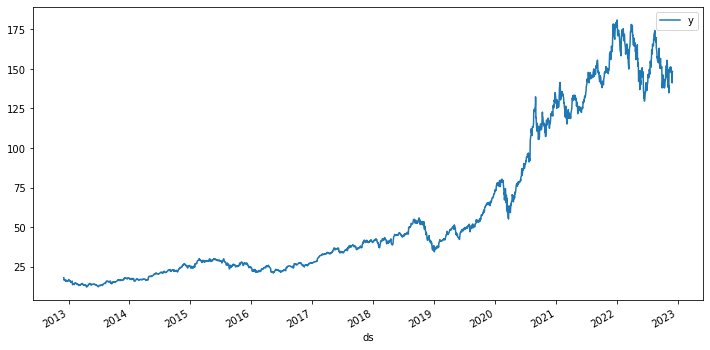

In [49]:
df_new.plot(x='ds', y='y', figsize=(12,6))

In [50]:
n = int(len(df_new)*0.9)
train = df_new[:n]
test = df_new[n:]
print(train.shape, test.shape)

(2266, 2) (252, 2)


In [51]:
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

17:41:18 - cmdstanpy - INFO - Chain [1] start processing
17:41:19 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-03,15.122675,9.934531,21.456142,15.122675,15.122675,0.502504,0.502504,0.502504,-0.573481,-0.573481,-0.573481,1.075985,1.075985,1.075985,0.0,0.0,0.0,15.625179
1,2012-12-04,15.122995,9.905430,21.383736,15.122995,15.122995,0.576444,0.576444,0.576444,-0.506774,-0.506774,-0.506774,1.083219,1.083219,1.083219,0.0,0.0,0.0,15.699440
2,2012-12-05,15.123315,9.795958,21.748536,15.123315,15.123315,0.576720,0.576720,0.576720,-0.514931,-0.514931,-0.514931,1.091651,1.091651,1.091651,0.0,0.0,0.0,15.700035
3,2012-12-06,15.123636,9.840856,21.474647,15.123636,15.123636,0.559529,0.559529,0.559529,-0.541766,-0.541766,-0.541766,1.101295,1.101295,1.101295,0.0,0.0,0.0,15.683165
4,2012-12-07,15.123956,9.980421,20.953682,15.123956,15.123956,0.440515,0.440515,0.440515,-0.671581,-0.671581,-0.671581,1.112097,1.112097,1.112097,0.0,0.0,0.0,15.564471


In [53]:
plot_plotly(model, forecast)

In [54]:
plot_components_plotly(model, forecast)

In [56]:
rmse = math.sqrt(mean_squared_error(forecast, test['y']))
print("The root mean squared error is {}.".format(rmse))
print("Mean value of test dataset is {}".format(test['y'].mean()))

ValueError: Found input variables with inconsistent numbers of samples: [2518, 252]

## Conclusion